In [1]:
using Plots, Distributions

# include main code
include("../src/functions.jl")

hjbsolver_delta1 (generic function with 1 method)

In [2]:
# definig distribution functions 
function FR12(u, b1, b2)
    lambda1 = 0.25
    lambda2 = 0.5
    return (-b1 * lambda2 * exp(-u * lambda1 / b1) + b2 * lambda1 * exp(-lambda2 * u / b2) + b1 * lambda2 - b2 * lambda1) / (b1 * lambda2 - b2 * lambda1)
end

F1 = SampleDistFun(x -> cdf(Gamma(3, 0.8), x), 40.0, 0.005)
F2(x) = 1 - exp(-0.7071067812 * sqrt(x))
FR1(x, a1) = F1(x / a1)
FR2(x, a2) = F2(x / a2)

FR(r, x) =
    0.3333333333333333 * FR1(x, r[1]) +
    0.4 * FR2(x, r[2]) +
    0.26666666666666666 * FR12(x, r[1], r[2])


ER1(a1) = 2.4 * a1
ER2(a2) = 4 * a2
ER12(a1, a2) = 4 * a1 + 2 * a2
ER(r) =
    0.3333333333333333 * ER1(r[1]) +
    0.4 * ER2(r[2]) +
    0.26666666666666666 * ER12(r[1], r[2])


ER (generic function with 1 method)

In [3]:
res = bisection_hjbsolver(
    a=166.0,
    b=333.0,
    max_it=20,
    NRe=2,
    β=5.0 + 6.0 + 4.0,
    FR=FR,
    ER=ER,
    EnoR=ER([1.0, 1.0]),
    partition=(0.0, 19.0, 200.0, 500.0),
    Δx=0.05,
    SearchRanges=([(0.0, 1.0), (0.0, 1.0)], [(0.0, 1.0), (1.0, 1.0)]),
    η=0.25,
    η1=0.3,
    δ=0.15,
    MaxEvals=1500,
    p=120,
    L=300
)

(166.0, 249.5, 333.0)
10%, V(50.0) = 1117.3   Time = 152.0 seconds
20%, V(100.0) = 1616.3   Time = 670.0 seconds
30%, V(150.0) = 2121.0   Time = 1550.0 seconds
40%, V(200.0) = 2694.8   Time = 2790.0 seconds
50%, V(250.0) = 3386.9   Time = 2790.0 seconds
60%, V(300.0) = 4261.5   Time = 2790.0 seconds
70%, V(350.0) = 5413.2   Time = 2800.0 seconds
80%, V(400.0) = 6984.3   Time = 2800.0 seconds
(166.0, 207.75, 249.5)
10%, V(50.0) = 921.92   Time = 196.0 seconds
20%, V(100.0) = 1301.4   Time = 734.0 seconds
30%, V(150.0) = 1639.7   Time = 1640.0 seconds
40%, V(200.0) = 1965.4   Time = 2910.0 seconds
50%, V(250.0) = 2283.1   Time = 2910.0 seconds
60%, V(300.0) = 2591.7   Time = 2910.0 seconds
70%, V(350.0) = 2887.1   Time = 2910.0 seconds
80%, V(400.0) = 3163.0   Time = 2910.0 seconds
90%, V(450.0) = 3409.5   Time = 2910.0 seconds
100%, V(500.0) = 3611.3   Time = 2910.0 seconds


2-element Vector{Any}:
 (0.0:0.05:437.15, [249.5, 251.87386008184208, 254.27097774137144, 256.6360865513233, 258.9827746616096, 261.31753506376583, 263.64407075158056, 265.96460381789024, 268.28060241278257, 270.5928786018903  …  8527.847140243208, 8530.229943986198, 8532.613596210978, 8534.998097268845, 8537.383447511238, 8539.769647289744, 8542.156696956094, 8544.544596862163, 8546.933347359975, 8549.3229488017], [47.47720163684174, 47.9423531905872, 47.302176199036836, 46.933762205726175, 46.69520804312471, 46.53071375629502, 46.41066132619411, 46.3199718978467, 46.24552378215434, 46.181152154557616  …  47.65607485982098, 47.67304449561723, 47.69002115733504, 47.70700484785609, 47.72399557010879, 47.74099332697579, 47.75799812137483, 47.77500995625725, 47.79202883450471, 47.80905475904292], [1.0 1.0; 0.9999998241362433 0.9999923097878062; … ; 0.9999999998417797 1.0; 0.9999999998417797 1.0], 1)
 (0.0:0.05:500.0, [207.75, 209.72663098999075, 211.72262524640718, 213.69195738066833, 215

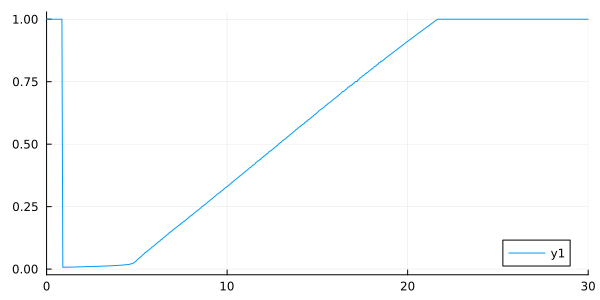

In [7]:
# reinsurance strategy line 1
plot(res[end][1], res[end][4][:, 1], size=(600, 300), xlims=(0, 30))

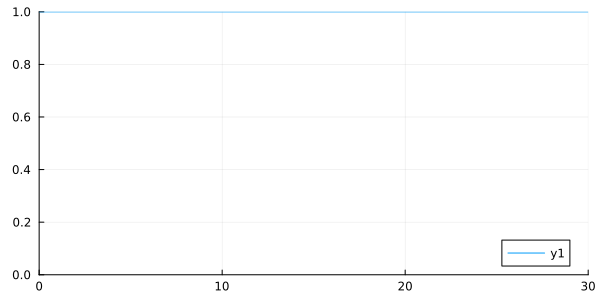

In [8]:
# line 2
plot(res[end][1], res[end][4][:, 2], size=(600, 300), xlims=(0, 30), ylims=(0, 1))

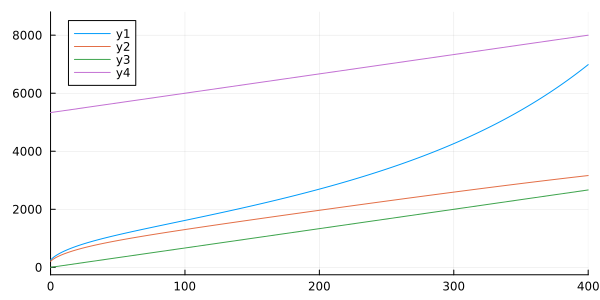

In [6]:
# value function
plot(res[1][1], res[1][2], size = (600, 300))
for i = 2:length(res)
    plot!(res[i][1], res[i][2], size = (600, 300))
end
δ = 0.15
p = 120
plot!(x -> x / δ, xlims = (0, 400))
plot!(x -> x / δ + p / δ^2, xlims = (0, 400))